## Author & Publisher Performance Analysis

Purpose

Analyze author - and publisher-level performance across 26 weeks

Identify:

- Consistently top-performing authors
- Publishers with sustained list presence
- Differences between many short-lived books vs few long-lasting books

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/history/nyt_history_weekly.csv")

df["published_date"] = pd.to_datetime(df["published_date"])
df["bestsellers_date"] = pd.to_datetime(df["bestsellers_date"])

# Sort correctly for time-series analysis
df = df.sort_values(
    ["title", "published_date"]
).reset_index(drop=True)


### Author-Level Analysis


In [6]:
author_stats = (
    df.groupby("author")
      .agg(
          total_appearances=("title", "count"),
          unique_titles=("title", "nunique"),
          avg_rank=("rank", "mean"),
          median_rank=("rank", "median"),
          max_weeks_on_list=("weeks_on_list", "max")
      )
      .sort_values("total_appearances", ascending=False)
)
author_stats.head(10)


,total_appearances,unique_titles,avg_rank,median_rank,max_weeks_on_list
author,,,,,
Rebecca Yarros,26,4,9.384615,9.0,98
Callie Hart,16,2,6.687500,5.5,11
Dan Brown,16,1,3.000000,2.5,17
Taylor Jenkins Reid,14,1,4.928571,3.5,17
SenLinYu,14,1,4.357143,5.0,15
Fredrik Backman,13,1,8.076923,8.0,20
Clare Leslie Hall,13,1,11.000000,11.0,26
Reese Witherspoon and Harlan Coben,11,1,8.818182,10.0,12
Freida McFadden,11,1,7.818182,8.0,12


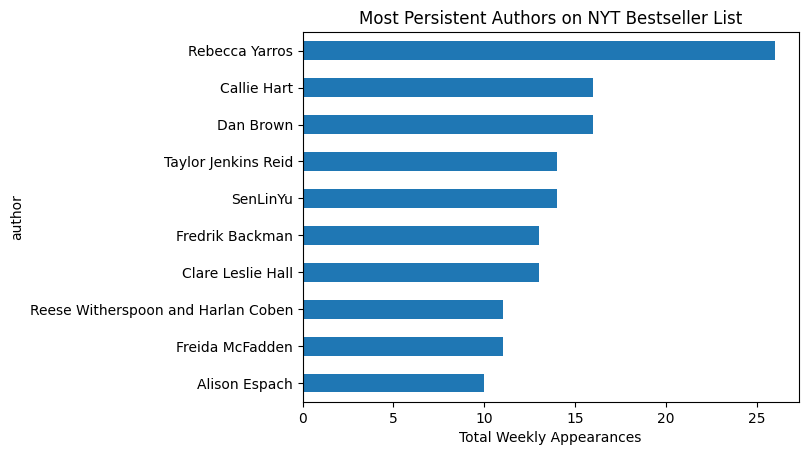

In [7]:
top_authors = author_stats.head(10)

plt.figure()
top_authors["total_appearances"].plot(kind="barh")
plt.gca().invert_yaxis()
plt.xlabel("Total Weekly Appearances")
plt.title("Most Persistent Authors on NYT Bestseller List")
plt.show()


The author-level summary shows that bestseller success is highly concentrated among a small group of writers. 
- Rebecca Yarros stands out with the highest number of total appearances and multiple unique titles, indicating sustained audience engagement across books rather than reliance on a single hit.
- Authors such as Dan Brown and Taylor Jenkins Reid achieve strong average and median ranks with fewer titles, suggesting consistent high placement when they do appear.
- In contrast, authors with higher appearance counts but weaker average ranks reflect long-running titles that persist on the list over time rather than dominating top positions. 

Overall, this pattern highlights two distinct modes of success on the bestseller list: short-term high-ranking performance versus long-term list longevity driven by reader loyalty.

### Top Authors by Longevity

### Publisher-Level Analysis

In [9]:
publisher_stats = (
    df.groupby("publisher")
      .agg(
          total_appearances=("title", "count"),
          unique_titles=("title", "nunique"),
          avg_rank=("rank", "mean"),
          median_rank=("rank", "median"),
          max_weeks_on_list=("weeks_on_list", "max")
      )
      .sort_values("total_appearances", ascending=False)
)

publisher_stats.head(10)

,total_appearances,unique_titles,avg_rank,median_rank,max_weeks_on_list
publisher,,,,,
Red Tower,30,7,9.233333,9.0,98
Doubleday,29,3,3.758621,2.0,52
"Little, Brown",22,6,8.000000,8.5,7
Grand Central,22,6,9.363636,10.0,12
Forever,19,3,6.631579,5.0,11
Atria,18,4,7.944444,8.0,20
Del Rey,17,4,5.117647,5.0,15
Harper,15,3,9.133333,9.0,11
Simon & Schuster,15,3,11.333333,11.0,26



- Red Tower has the most total appearances and the most unique titles, meaning it shows up often and with variety, but its average/median rank (~9) implies it tends to sit mid-list rather than consistently in the top few spots. Its very high max weeks on list (98) points to strong staying power from at least one long-running title.
- Doubleday is the standout for top performance: high appearances with a much stronger average rank (~3.8) and median rank (2), meaning when Doubleday books appear, they’re often near the top of the list, and the max weeks (52) suggests solid longevity too.
- Publishers like Little, Brown and Grand Central have high appearances and several unique titles, but their average ranks (~8–9) and relatively low max-weeks (7–12) suggest broader presence without the same long-running blockbuster effect.
- Ballantine** is an example of a publisher driven by a single strong title (unique_titles = 1) that performs very well (avg rank ~4.9, median 3.5) and lasts (max weeks 17).


### Case Study

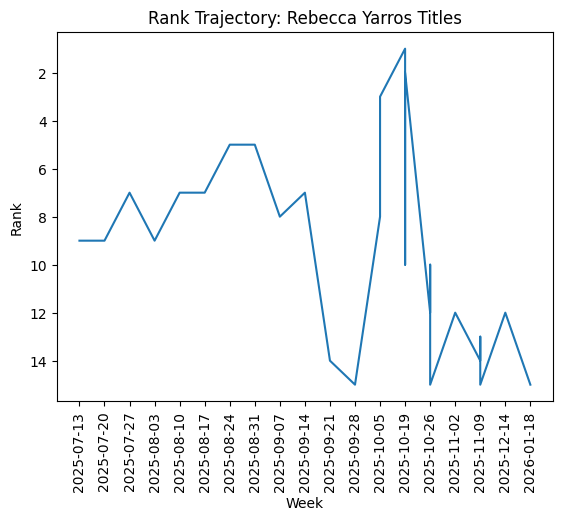

In [13]:
author_df = df[df["author"] == "Rebecca Yarros"].sort_values("published_date")

plt.figure()
plt.plot(author_df["published_date"], author_df["rank"])
plt.gca().invert_yaxis()
plt.title("Rank Trajectory: Rebecca Yarros Titles")
plt.xlabel("Week")
plt.xticks(rotation=90)
plt.ylabel("Rank")
plt.show()


- This trajectory shows high volatility rather than a smooth rise or decline for Rebecca Yarros’ titles.
- Early in the period, her books sit mostly in the upper–mid ranks (around 6–9), indicating a solid but not dominant position.
- There is a sharp drop into worse ranks (14–15) around late September, suggesting either increased competition or a cooling phase after initial momentum.
- The sudden spike back to very strong ranks (2–3) in October points to a new release or renewed attention, which briefly pushes her titles near the top of the list.
- After this peak, ranks fluctuate again and generally settle in the lower half of the list (10–15), indicating sustained presence but reduced dominance.

### Rank Volatality

Rank volatility measures how much a book’s position fluctuates week to week.
Lower volatility indicates stable, sustained performance, while higher volatility reflects sharp rises and drops driven by hype, releases, or competition.

Author-Level Rank Volatility

In [14]:
author_volatility = (
    df.groupby("author")
      .agg(
          total_appearances=("rank", "count"),
          avg_rank=("rank", "mean"),
          rank_volatility=("rank", "std"),
          max_weeks_on_list=("weeks_on_list", "max"),
      )
      .sort_values("rank_volatility", ascending=False)
)

author_volatility.head(10)

,total_appearances,avg_rank,rank_volatility,max_weeks_on_list
author,,,,
Brigitte Knightley,2,8.500000,9.192388,2
Nora Roberts,2,8.000000,8.485281,2
Jack Carr,2,8.500000,7.778175,2
Louise Penny,2,6.000000,7.071068,2
Sarah Beth Durst,4,8.500000,6.403124,4
Jasmine Mas,2,7.500000,6.363961,2
Julie Soto,3,6.333333,6.110101,3
Lisa Jewell,3,7.666667,5.859465,3
J.D. Robb,3,7.333333,5.859465,3


- Authors with very high volatility and few appearances likely experienced short-lived hype or sharp debut/fall patterns.
- High volatility combined with low max weeks on list suggests unstable chart performance rather than sustained popularity.
- Authors with moderate volatility and more appearances indicate recurring presence but fluctuating ranks across weeks.
- Volatility here reflects week-to-week movement, not overall success—some authors fluctuate despite reasonable average ranks.

Publisher-Level Rank Volatility

In [15]:
publisher_volatility = (
    df.groupby("publisher")
      .agg(
          total_appearances=("rank", "count"),
          avg_rank=("rank", "mean"),
          rank_volatility=("rank", "std"),
          max_weeks_on_list=("weeks_on_list", "max"),
      )
      .sort_values("rank_volatility", ascending=False)
)

publisher_volatility.head(10)


,total_appearances,avg_rank,rank_volatility,max_weeks_on_list
publisher,,,,
Random House Worlds,2,9.500000,7.778175,1
Canary Street,2,7.500000,6.363961,2
Minotaur,3,8.000000,6.082763,2
Harper Voyager,7,6.571429,5.682052,6
Bramble,8,8.500000,5.656854,4
Morrow,3,8.000000,5.567764,1
Fox News,3,8.000000,5.567764,3
Atria/Emily Bestler,4,6.250000,5.439056,2
Gallery,4,7.000000,5.416026,1


- Publishers with high volatility and low appearances tend to rely on sporadic or event-driven releases.
- Moderate-to-high volatility with more appearances suggests active publishing pipelines but uneven weekly performance.
- Lower max weeks on list alongside high volatility implies titles that struggle to maintain momentum.
- Overall, publisher volatility highlights differing strategies between blockbuster launches and steady catalog performance.

### Author Performance vs. Rank Stability

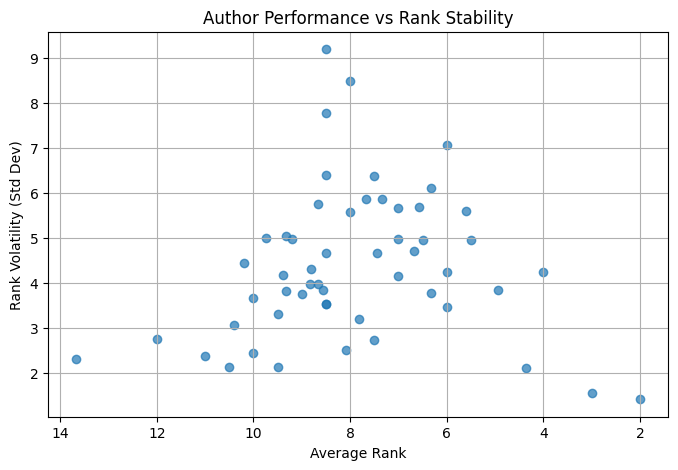

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(
    author_volatility["avg_rank"],
    author_volatility["rank_volatility"],
    alpha=0.7
)

plt.xlabel("Average Rank")
plt.ylabel("Rank Volatility (Std Dev)")
plt.title("Author Performance vs Rank Stability")
plt.gca().invert_xaxis()  # better rank = lower number
plt.grid(True)
plt.show()


- There is a general trade-off between performance and stability: authors with better average ranks (closer to 1, right side of the plot) tend to show lower rank volatility, indicating more consistent weekly performance.
- Authors with mid-range average ranks (around 6–10) display the widest spread in volatility, suggesting frequent rank swings despite regular appearances.
- High volatility at poorer average ranks implies short-lived spikes or rapid declines, often driven by new releases or fading interest.
- A small cluster of authors combines strong average rank with low volatility, representing the most reliably high-performing authors on the list.

### Key Takeaways

- A small group of authors and publishers account for a large share of bestseller appearances, indicating strong brand and audience loyalty.
- Consistently high-performing authors tend to balance good average ranks with lower volatility, while others experience sharp but short-lived success.
- Publishers with multiple recurring titles generally show more stable rank performance compared to those driven by one-off hits.
- Overall, sustained presence on the bestseller list appears to be driven more by consistency over time than by occasional high-rank spikes.

---